In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart.csv


In [2]:
import seaborn as sns

In [3]:
heart_data=pd.read_csv('../input/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
X = heart_data.iloc[:,:-1]
y = heart_data.iloc[:,-1]

In [5]:
corr = heart_data.corr(method='pearson')
type(corr)

pandas.core.frame.DataFrame

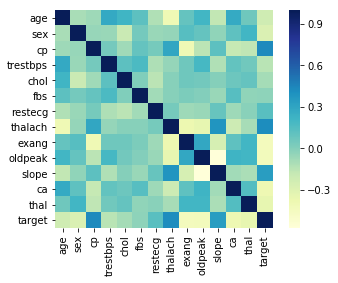

In [6]:
ax = sns.heatmap(corr,cmap='YlGnBu',square=True)

In [7]:
best_features = corr['target'][(abs(corr['target']>0.3)) & (abs(corr['target']!=1))]
best_features_col = list(best_features.index)

In [8]:
input_values_x_0 = heart_data[best_features_col[0]][heart_data['target']==0]
input_values_y_0 = heart_data[best_features_col[1]][heart_data['target']==0]
input_values_z_0 = heart_data[best_features_col[2]][heart_data['target']==0]
output_values_0 = heart_data['target'][heart_data['target']==0]

input_values_x_1 = heart_data[best_features_col[0]][heart_data['target']==1]
input_values_y_1 = heart_data[best_features_col[1]][heart_data['target']==1]
input_values_z_1 = heart_data[best_features_col[2]][heart_data['target']==1]
output_values_1 = heart_data['target'][heart_data['target']==1]


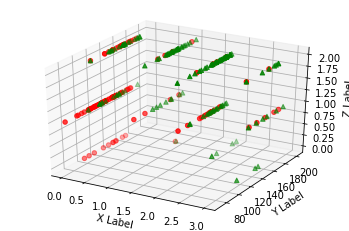

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#for i in range(0,len(input_values[:,0])):
ax.scatter(input_values_x_0,input_values_y_0,input_values_z_0,c='r',marker='o')
ax.scatter(input_values_x_1,input_values_y_1,input_values_z_1,c='g',marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [10]:
#X[best_features_col]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X[best_features_col])
type(X_scaled)
X_scaled_df=pd.DataFrame(X_scaled)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df,y,test_size=0.2)

In [12]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
preds=clf.predict(X_test)

from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,preds)
print(acc)

0.7704918032786885


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
#clf_rf = RandomForestClassifier(n_estimators=50)  # 72% accuracy
clf_rf=KNeighborsClassifier(n_neighbors=10)
clf_rf.fit(X_train,y_train)
preds_rf = clf_rf.predict(X_test)

acc_rf = accuracy_score(y_test,preds_rf)
print(acc_rf)

0.8032786885245902
